# Import Libraries

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the image

In [83]:
img = cv2.cvtColor(cv2.imread('original_images/robot_image2.jpg'), cv2.COLOR_BGR2RGB)

## Image rezolution

In [84]:
img.shape

(1440, 2560, 3)

## Show image

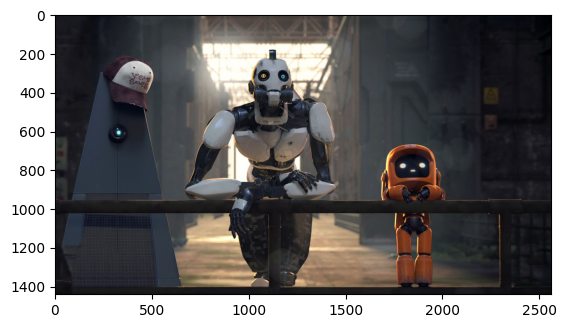

In [85]:
plt.imshow(img)

## Break image into seperate channels: <font color='red'>Red</font>, <font color='green'>Green</font> and <font color='blue'>Blue</font>

In [86]:
r, g, b = cv2.split(img)

## Normalize the channels
Value between 0 and 1

In [87]:
r, g, b = r / 255, g / 255, b /255

Visualize the channels

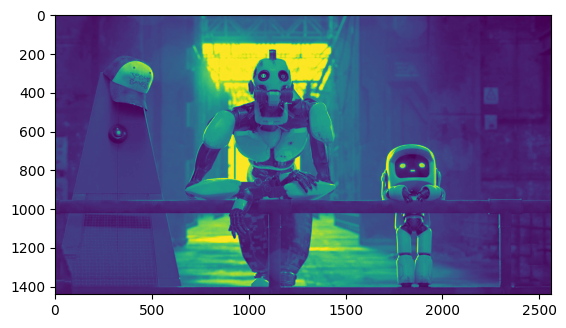

In [88]:
plt.imshow(r)

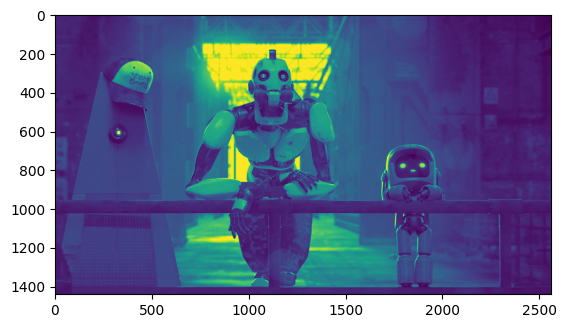

In [89]:
plt.imshow(g)

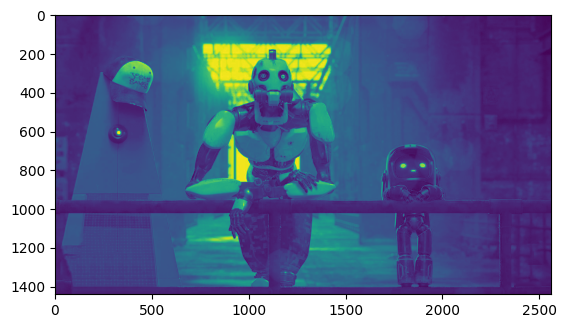

In [90]:
plt.imshow(b)

## Compressing the rows of the image
We want to compress current numbers of columns (2560) to the dimension of (200)

In [111]:
pca_components = 200

pca_r = PCA(n_components=pca_components)
reduced_r = pca_r.fit_transform(r)

pca_g = PCA(n_components=pca_components)
reduced_g = pca_g.fit_transform(g)

pca_b = PCA(n_components=pca_components)
reduced_b = pca_b.fit_transform(b)

In [107]:
reduced_r.shape

(1440, 200)

Now we reconstruct the image from 200 dimension to compare the compressed result with original

In [108]:
reconstructed_r = pca_r.inverse_transform(reduced_r)
reconstructed_g = pca_g.inverse_transform(reduced_g)
reconstructed_b = pca_b.inverse_transform(reduced_b)

In [102]:
img_reconstructed = (cv2.merge((reconstructed_r, reconstructed_g, reconstructed_b)))
img_reconstructed.shape

(1440, 2560, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


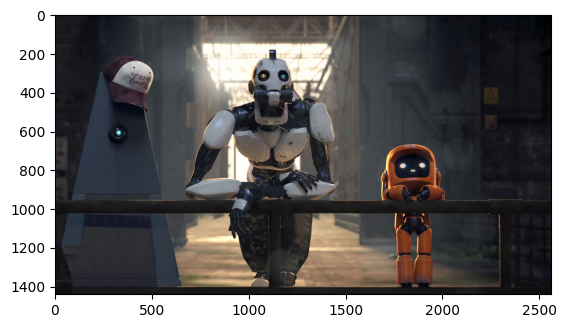

In [110]:
plt.imshow(img_reconstructed)